### Project Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import statistics
from numpy import set_printoptions
import datetime
from dateutil.parser import parse
from datetime import datetime
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
%config InlineBackend.figure_format = 'retina' # Plotting Pretty figures and avoiding blurry images
sns.set_context('notebook') # Larger scale for plots in notebooks
from skimpy import skim

# Libraries for data preparation and model building

from sklearn.model_selection import train_test_split # Import the split function from sklearn


# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
# load the data
df = pd.read_csv('df_train.csv')
pd.set_option('display.max_columns', 500) # load the data

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


## Univariate Non- Graphical Exploration

In [3]:
# Looking at the top five rows of our data 
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


Looking at the top five rows of our data we can see all our features as well as the types of data we are working with.

- 'time'
- 'Madrid_wind_speed'
- 'Valencia_wind_deg'
- 'Bilbao_rain_1h' 
- 'Valencia_wind_speed'
- 'Seville_humidity'
- 'Madrid_humidity' 
- 'Bilbao_clouds_all'
- 'Bilbao_wind_speed',
- 'Seville_clouds_all' 
- 'Bilbao_wind_deg' 
- 'Barcelona_wind_speed'
- 'Barcelona_wind_deg'
- 'Madrid_clouds_all'
- 'Seville_wind_speed'
- 'Barcelona_rain_1h'
- 'Seville_pressure'
- 'Seville_rain_1h'
- 'Bilbao_snow_3h'
- 'Barcelona_pressure'
- 'Seville_rain_3h'
- 'Madrid_rain_1h'
- 'Barcelona_rain_3h'
- 'Valencia_snow_3h',
- 'Madrid_weather_id'
- 'Barcelona_weather_id'
- 'Bilbao_pressure',
- 'Seville_weather_id'
- 'Valencia_pressure'
- 'Seville_temp_max'
- 'Madrid_pressure'
- 'Valencia_temp_max'
- 'Valencia_temp',
- 'Bilbao_weather_id'
- 'Seville_temp'
- 'Valencia_humidity' 
- 'Valencia_temp_min'
- 'Barcelona_temp_max'
- 'Madrid_temp_max',
- 'Barcelona_temp'
- 'Bilbao_temp_min'
- 'Bilbao_temp',
- 'Barcelona_temp_min'
- 'Bilbao_temp_max' 
- 'Seville_temp_min'
- 'Madrid_temp'
- 'Madrid_temp_min'
- 'load_shortfall_3h'
      


In [4]:
df.shape

(8763, 49)

The shape command shows us that we have 8763 rows of data and 49 features including the unnamed which is not elevant and will be dropped soon.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [6]:
df.nunique()

Unnamed: 0              8763
time                    8763
Madrid_wind_speed         38
Valencia_wind_deg         10
Bilbao_rain_1h            20
Valencia_wind_speed       58
Seville_humidity         274
Madrid_humidity          280
Bilbao_clouds_all        277
Bilbao_wind_speed         39
Seville_clouds_all       246
Bilbao_wind_deg         1042
Barcelona_wind_speed      39
Barcelona_wind_deg       974
Madrid_clouds_all        250
Seville_wind_speed        38
Barcelona_rain_1h         31
Seville_pressure          25
Seville_rain_1h           17
Bilbao_snow_3h            83
Barcelona_pressure       189
Seville_rain_3h           50
Madrid_rain_1h            19
Barcelona_rain_3h         77
Valencia_snow_3h           6
Madrid_weather_id        289
Barcelona_weather_id     269
Bilbao_pressure          205
Seville_weather_id       301
Valencia_pressure        143
Seville_temp_max        3294
Madrid_pressure          298
Valencia_temp_max       3387
Valencia_temp           4531
Bilbao_weather

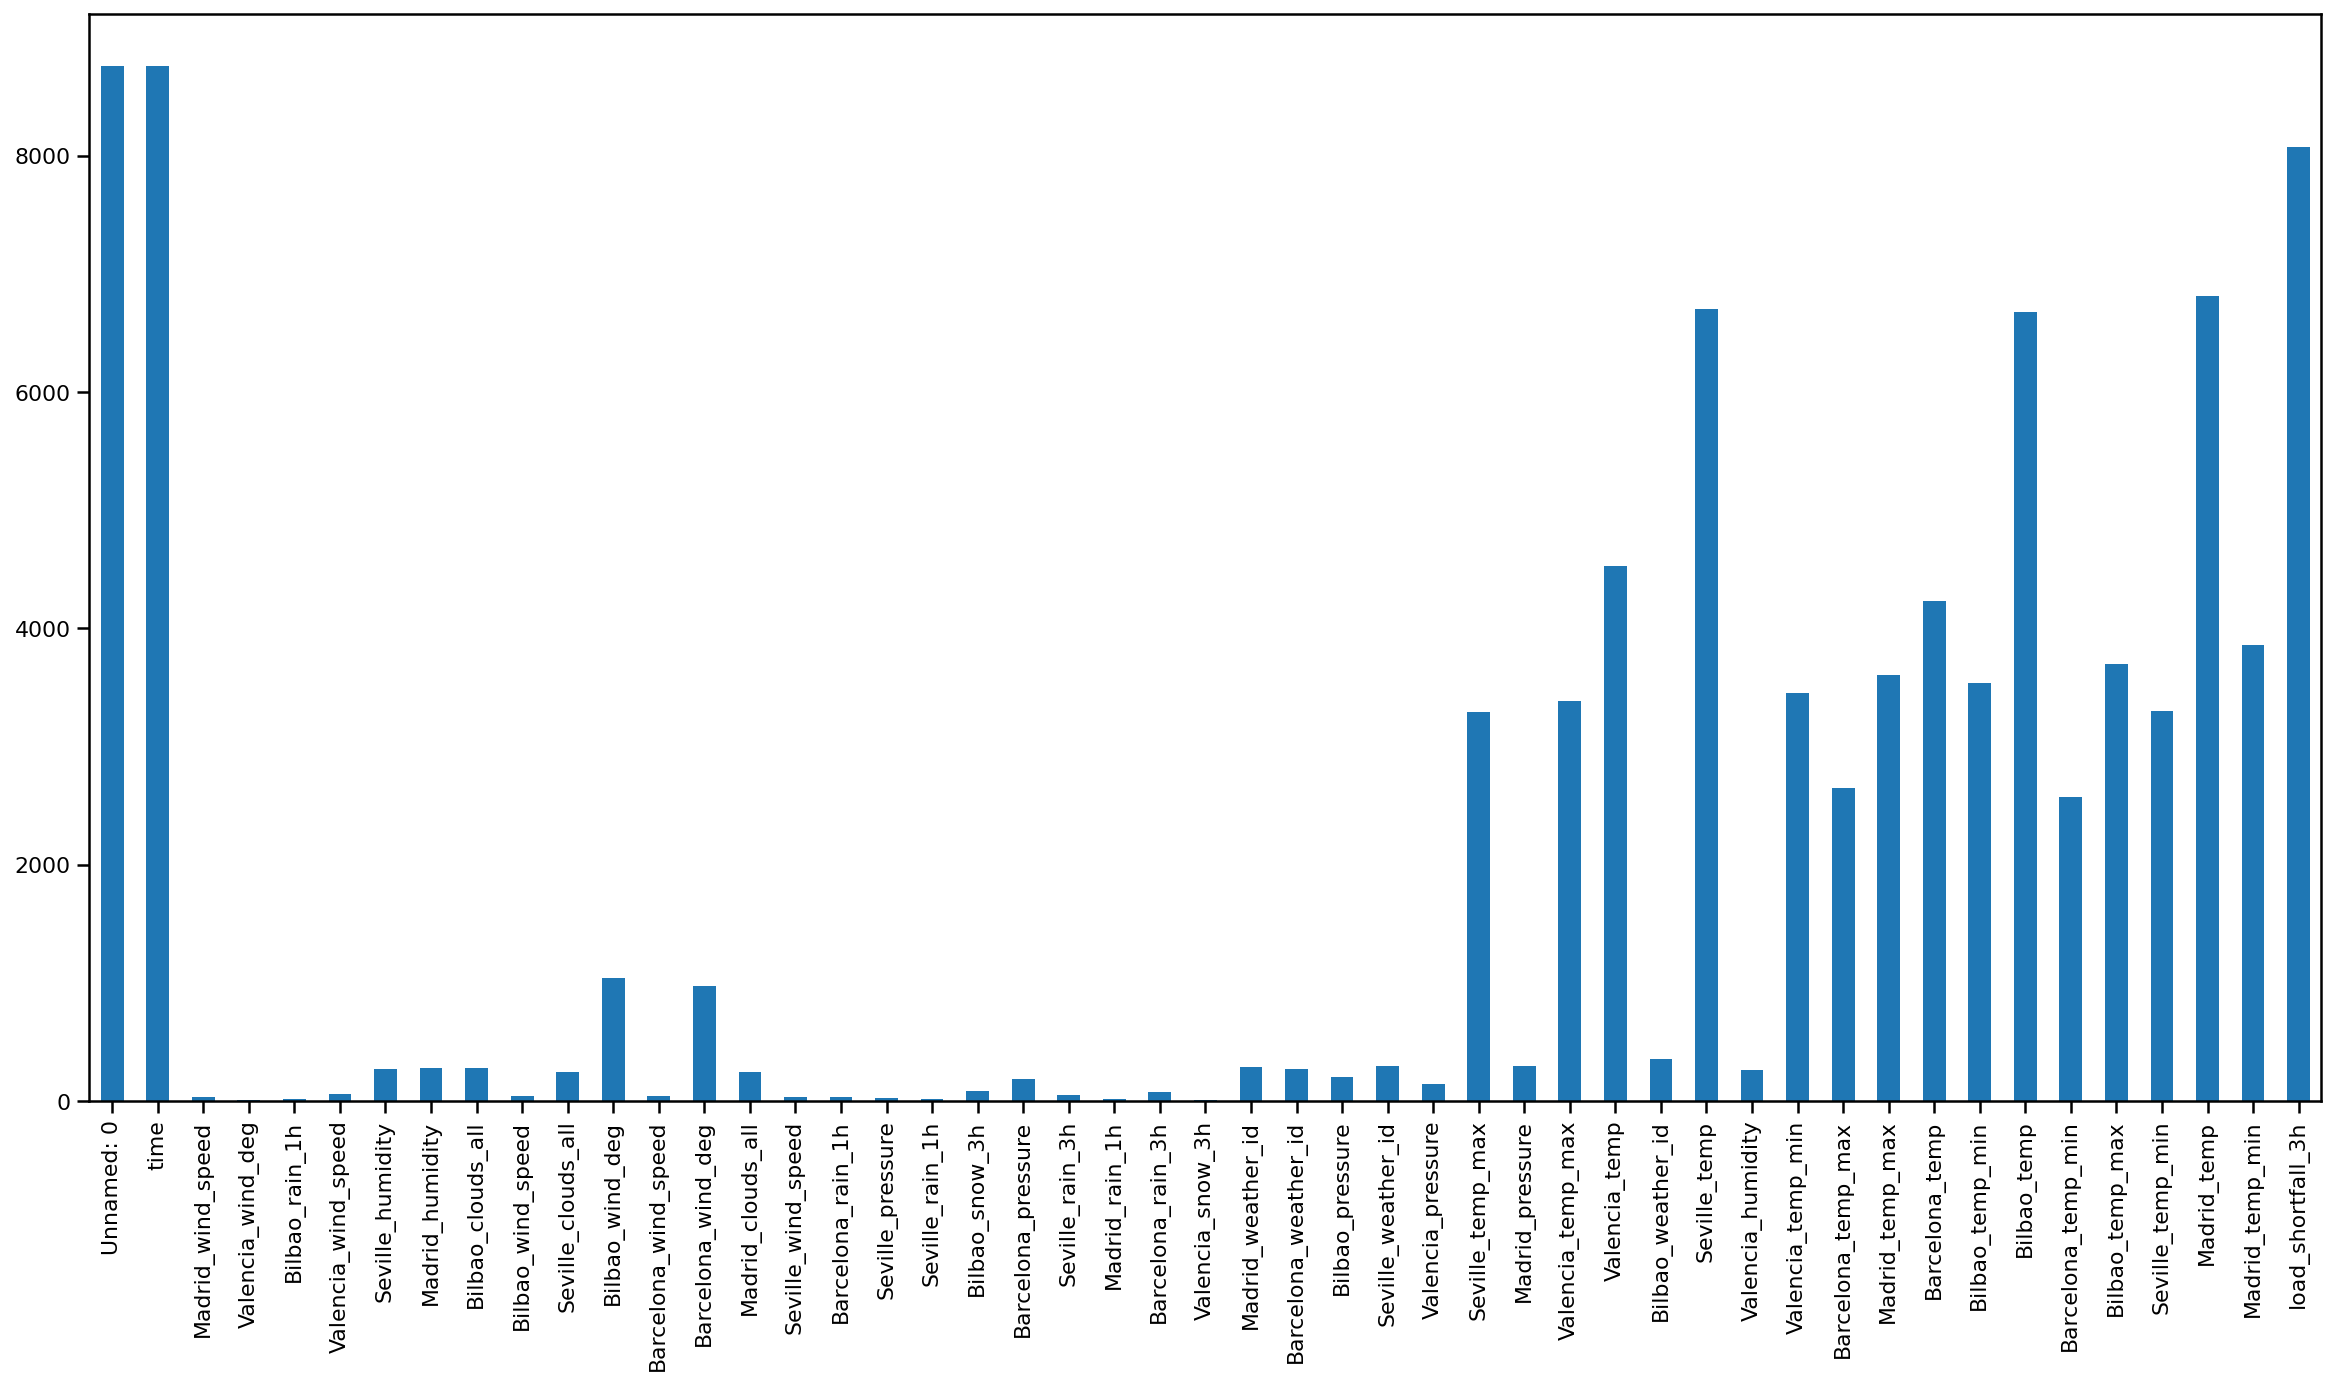

In [7]:
# Let's check for the number of unique values in each column
df.nunique().plot(kind= 'bar', figsize = (20,10));

In [8]:
# Check for missing values in the data
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

The `Valencia_pressure` has missing records of 2068, this is quite large, let's check the percentage composition of this.

In [9]:
# Calculate the percentage of missing value
valueList = list()
colList= list()
for col in df.columns:
    percentageMissing = np.mean(df[col].isnull()) * 100
    colList.append(col)
    valueList.append(percentageMissing)
percentageMissingDf = pd.DataFrame()
percentageMissingDf['col'] = colList
percentageMissingDf['percentageMissing'] = valueList
percentageMissingDf

,col,percentageMissing
0,Unnamed: 0,0.000000
1,time,0.000000
2,Madrid_wind_speed,0.000000
3,Valencia_wind_deg,0.000000
4,Bilbao_rain_1h,0.000000
5,Valencia_wind_speed,0.000000
6,Seville_humidity,0.000000
7,Madrid_humidity,0.000000
8,Bilbao_clouds_all,0.000000
9,Bilbao_wind_speed,0.000000


The `Valencia_pressure` missing data is 23.6%, the proportion of the data is too large to drop. We will devise other means to take care of this.

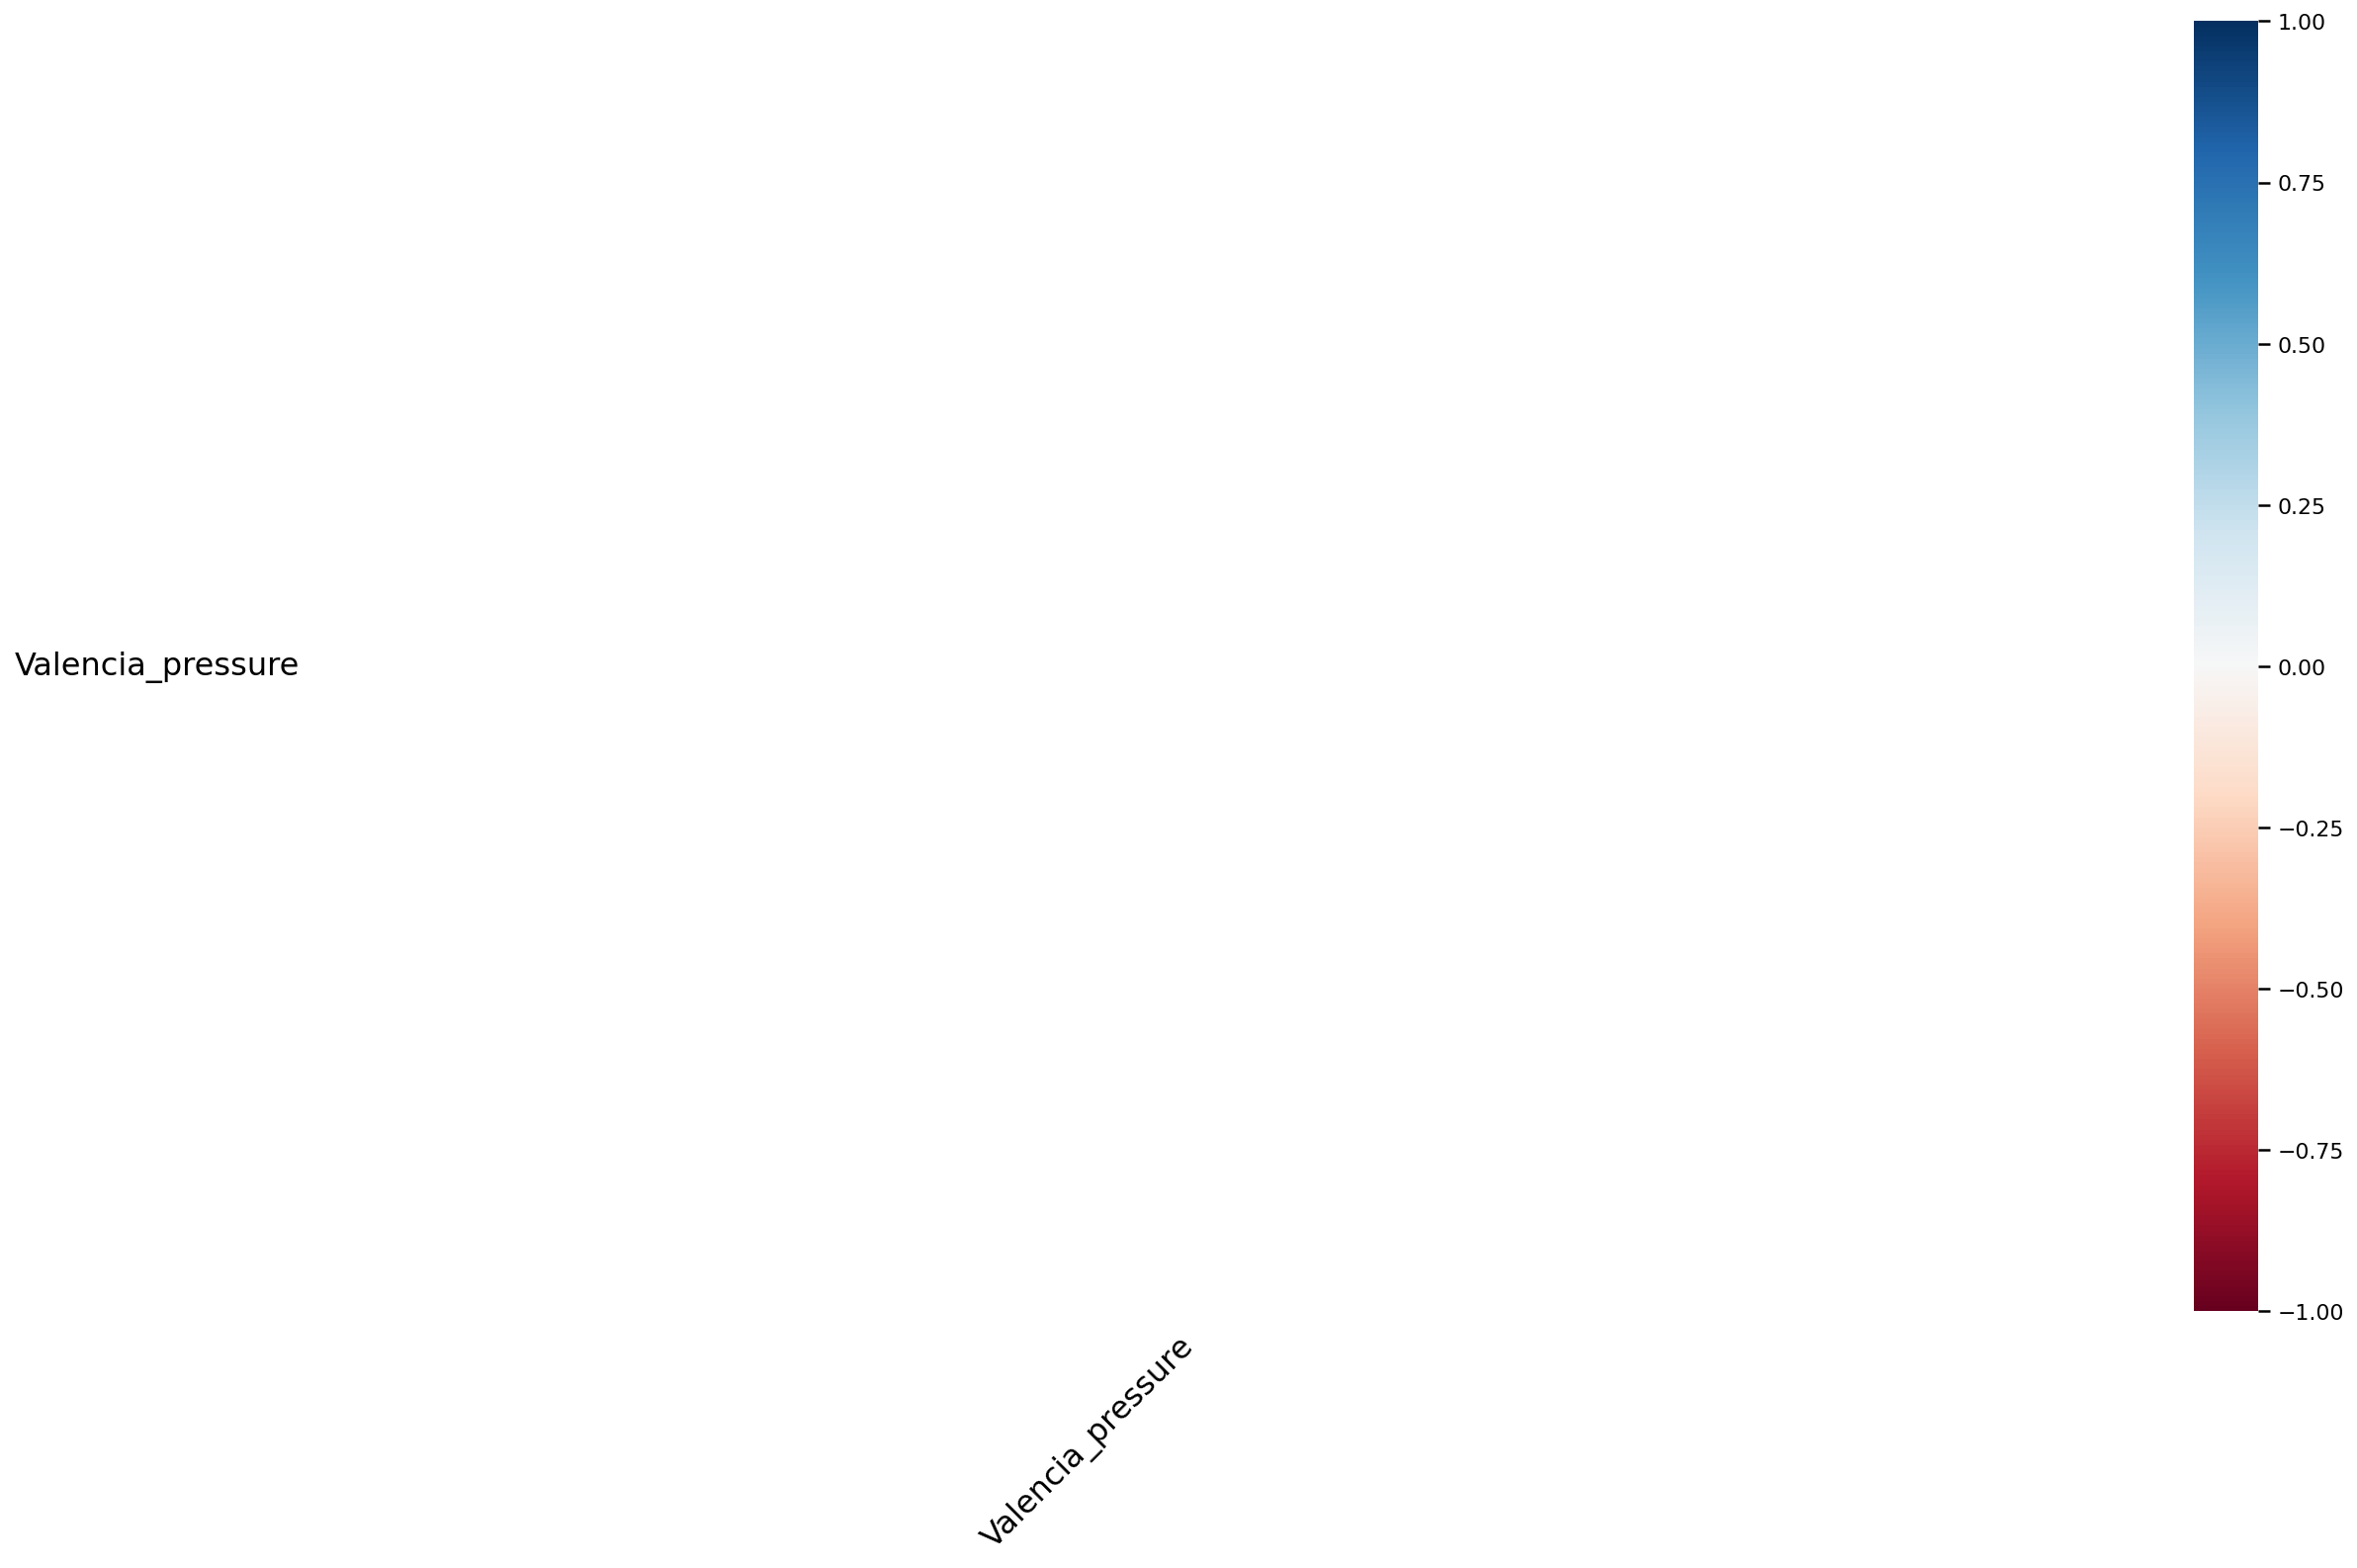

In [10]:
# missingness matrix
msno.heatmap(df);
plt.savefig('missing_values')

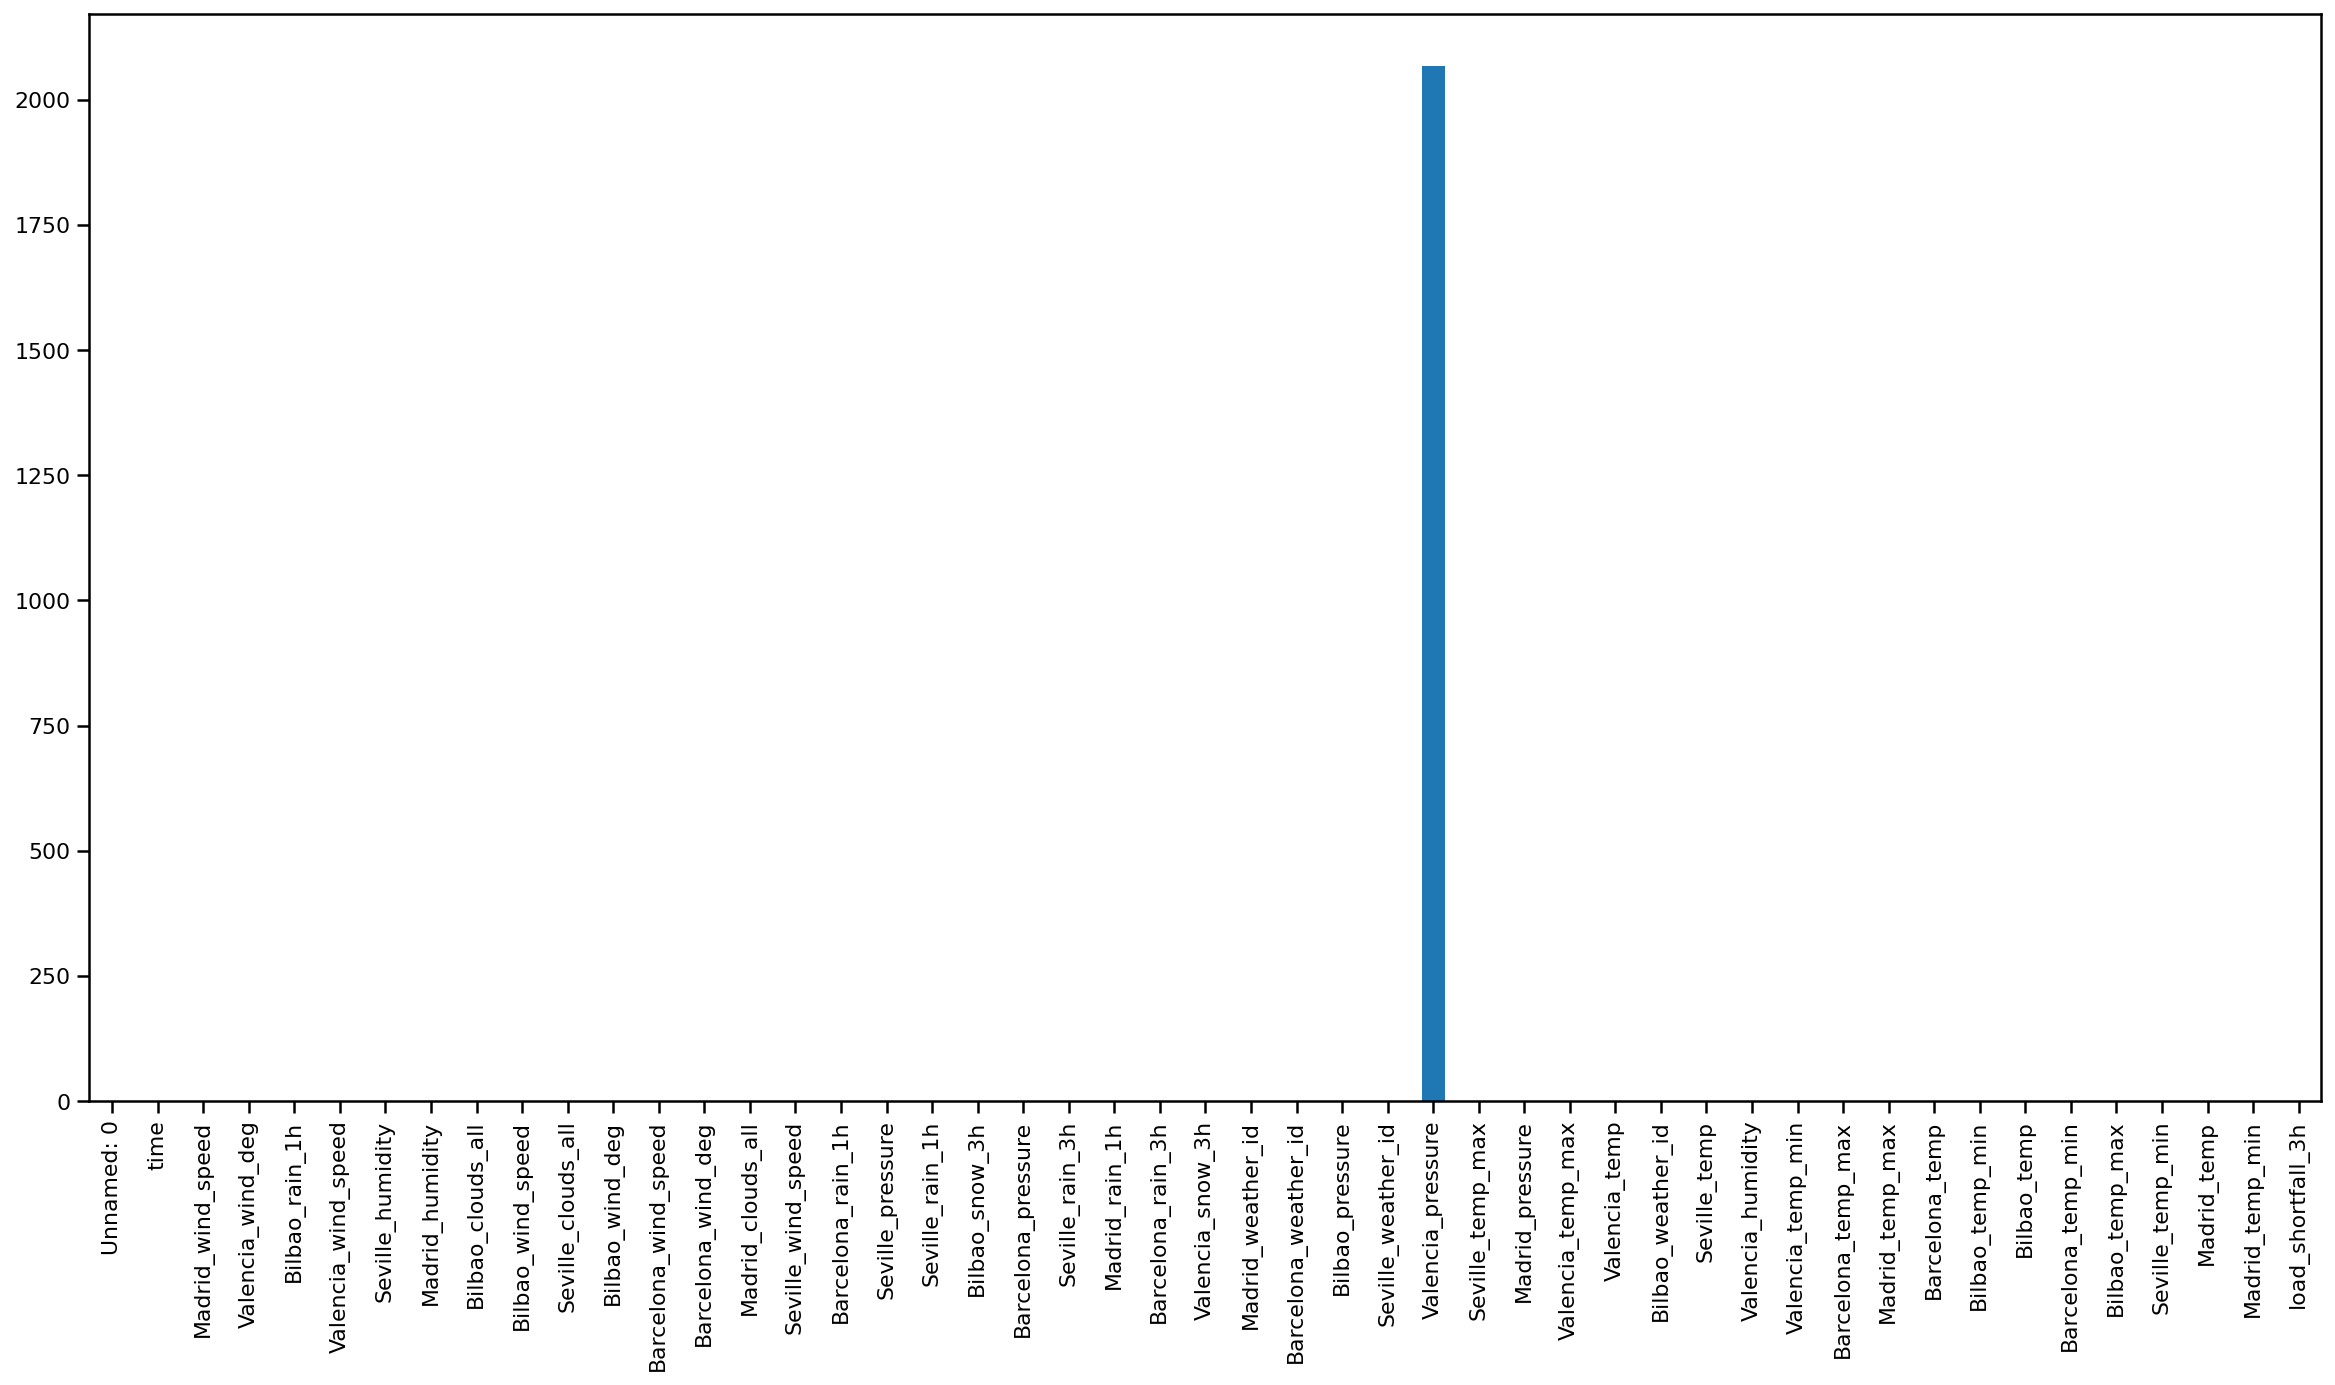

In [11]:
df.isnull().sum().plot(kind= 'bar', figsize = (20,10));

In [12]:
# Check for outliers in our data
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

The following features has high amount of outliers

- Barcelona_rain_1h  :      101.578931

- Seville_rain_1h    :       93.840746

- Bilbao_snow_3h           806.128471

- Barcelona_pressure      3687.564230

- Seville_rain_3h          413.136592

- Madrid_rain_1h            76.584491

- Barcelona_rain_3h        187.800460 

- Valencia_snow_3h        4089.323165

- Madrid_weather_id          9.259047

- Barcelona_weather_id       5.701882

- Seville_weather_id        10.710308

In [13]:
df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

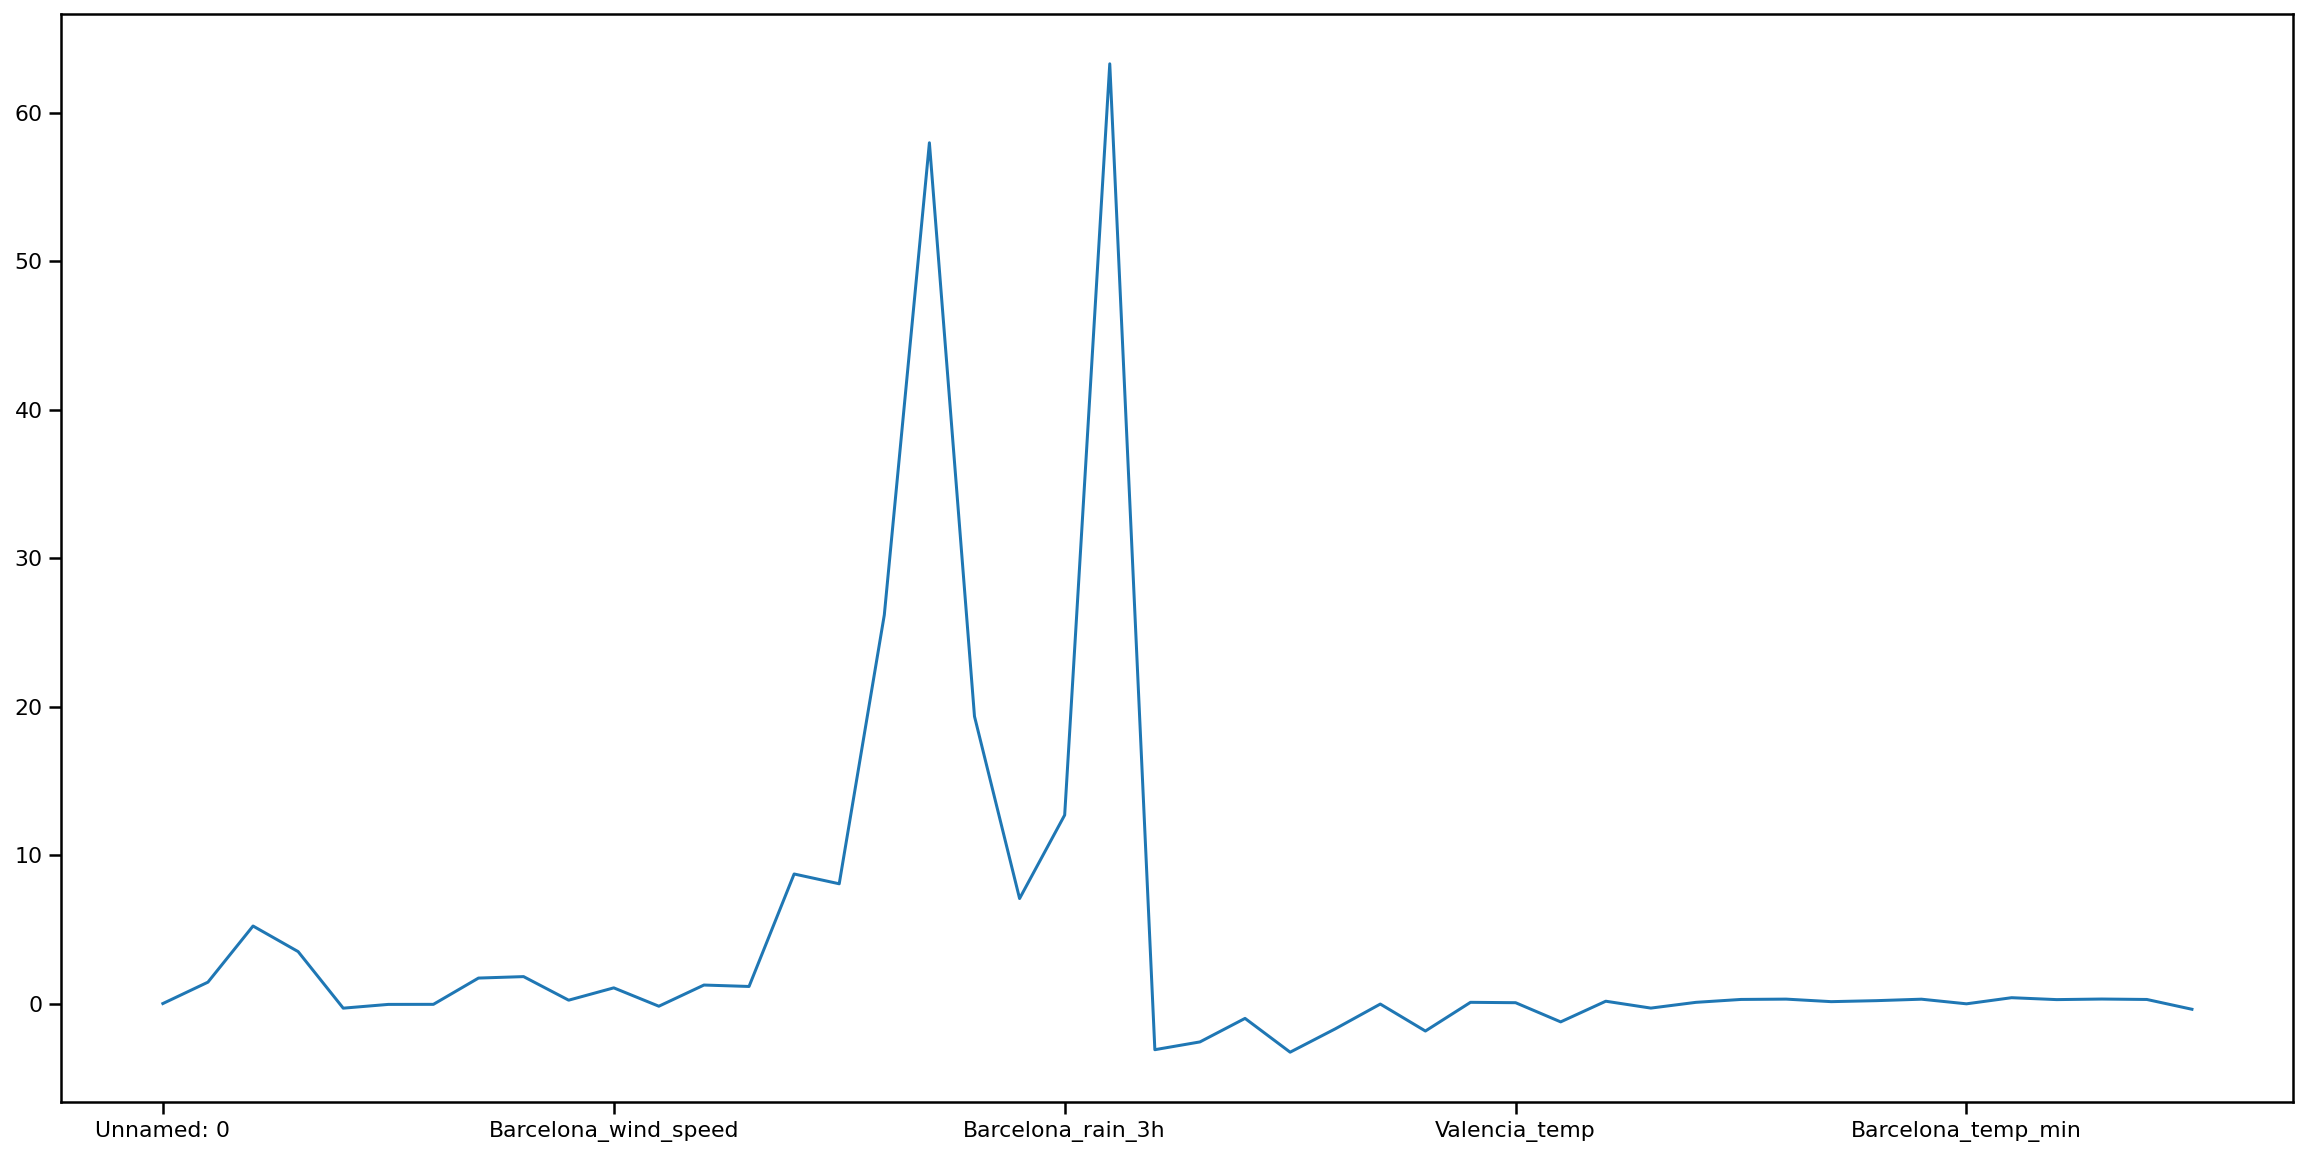

In [14]:
df.skew().plot(figsize = (20,10));

In [15]:
df.columns.tolist()

['Unnamed: 0',
 'time',
 'Madrid_wind_speed',
 'Valencia_wind_deg',
 'Bilbao_rain_1h',
 'Valencia_wind_speed',
 'Seville_humidity',
 'Madrid_humidity',
 'Bilbao_clouds_all',
 'Bilbao_wind_speed',
 'Seville_clouds_all',
 'Bilbao_wind_deg',
 'Barcelona_wind_speed',
 'Barcelona_wind_deg',
 'Madrid_clouds_all',
 'Seville_wind_speed',
 'Barcelona_rain_1h',
 'Seville_pressure',
 'Seville_rain_1h',
 'Bilbao_snow_3h',
 'Barcelona_pressure',
 'Seville_rain_3h',
 'Madrid_rain_1h',
 'Barcelona_rain_3h',
 'Valencia_snow_3h',
 'Madrid_weather_id',
 'Barcelona_weather_id',
 'Bilbao_pressure',
 'Seville_weather_id',
 'Valencia_pressure',
 'Seville_temp_max',
 'Madrid_pressure',
 'Valencia_temp_max',
 'Valencia_temp',
 'Bilbao_weather_id',
 'Seville_temp',
 'Valencia_humidity',
 'Valencia_temp_min',
 'Barcelona_temp_max',
 'Madrid_temp_max',
 'Barcelona_temp',
 'Bilbao_temp_min',
 'Bilbao_temp',
 'Barcelona_temp_min',
 'Bilbao_temp_max',
 'Seville_temp_min',
 'Madrid_temp',
 'Madrid_temp_min',
 'load_

In [16]:
# look at data statistics

df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8.763000e+03,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,6695.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,2.870497,190.544848,19.473392,2.425045,0.128906,0.039439,0.031912,1.377965e+03,0.000243,0.037818,0.000439,0.000205,773.527594,765.979687,1017.739549,774.658818,1012.051407,297.479527,1010.316920,291.337233,290.592152,724.722362,293.978903,65.247727,289.867648,291.157644,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,1.792197,89.077337,28.053660,1.672895,0.634730,0.175857,0.557264,1.407314e+04,0.003660,0.152639,0.003994,0.011866,77.313315,88.142235,10.046124,71.940009,9.506214,8.875812,22.198555,7.565692,7.162274,115.846537,7.920986,19.262322,6.907402,7.273538,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,1.666667,118.166667,0.000000,1.000000,0.000000,0.000000,0.000000,1.014000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.000000,800.000000,1010.333333,291.312750,1012.333333,285.550167,285.150000,700.333333,288.282917,51.333333,284.783333,285.483333,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,2.666667,200.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.018000e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.333333,1019.000000,800.000000,1015.000000,297.101667,1017.333333,291.037000,290.176667,800.000000,293.323333,67.000000,289.550000,290.150000,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,4.000000,260.000000,33.333333,3.333333,0.000000,0.000000,0.000000,1.022000e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1024.000000,800.000000,1018.000000,304.150000,1022.00

Looking at the summary statistics, we can identify some potential issues, some of them are as follows:

    - The range of the data (Max - Min) is too wide from feature to feature, we would need to rescale the data.
    
    - Also their are some exagerated figures (which could be potential outliers) this would be explored in great         details.
    
    - The standard deviation of the data is too far apart, We will standardize the data.
    

In [17]:
df.Valencia_pressure.describe()

count    6695.000000
mean     1012.051407
std         9.506214
min       972.666667
25%      1010.333333
50%      1015.000000
75%      1018.000000
max      1021.666667
Name: Valencia_pressure, dtype: float64

In [18]:
df.Valencia_pressure.mode()

0    1018.0
Name: Valencia_pressure, dtype: float64

In [19]:
# plot relevant feature interactions

## Univariate Graphical Exploration


In [20]:
features = ['time',
 'Madrid_wind_speed',
 'Valencia_wind_deg',
 'Bilbao_rain_1h',
 'Valencia_wind_speed',
 'Seville_humidity',
 'Madrid_humidity',
 'Bilbao_clouds_all',
 'Bilbao_wind_speed',
 'Seville_clouds_all',
 'Bilbao_wind_deg',
 'Barcelona_wind_speed',
 'Barcelona_wind_deg',
 'Madrid_clouds_all',
 'Seville_wind_speed',
 'Barcelona_rain_1h',
 'Seville_pressure',
 'Seville_rain_1h',
 'Bilbao_snow_3h',
 'Barcelona_pressure',
 'Seville_rain_3h',
 'Madrid_rain_1h',
 'Barcelona_rain_3h',
 'Valencia_snow_3h',
 'Madrid_weather_id',
 'Barcelona_weather_id',
 'Bilbao_pressure',
 'Seville_weather_id',
 'Valencia_pressure',
 'Seville_temp_max',
 'Madrid_pressure',
 'Valencia_temp_max',
 'Valencia_temp',
 'Bilbao_weather_id',
 'Seville_temp',
 'Valencia_humidity',
 'Valencia_temp_min',
 'Barcelona_temp_max',
 'Madrid_temp_max',
 'Barcelona_temp',
 'Bilbao_temp_min',
 'Bilbao_temp',
 'Barcelona_temp_min',
 'Bilbao_temp_max',
 'Seville_temp_min',
 'Madrid_temp',
 'Madrid_temp_min',
 'load_shortfall_3h']

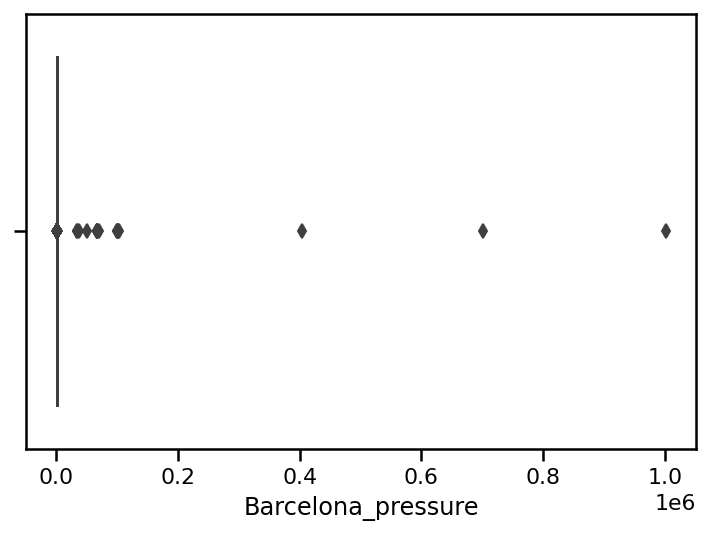

In [21]:
sns.boxplot(df['Barcelona_pressure']);

- The boxplot shows that Barcelona_pressure has about seven outliers
- We then looked at values that are greater than the maximum pressure ever recorded (1084).

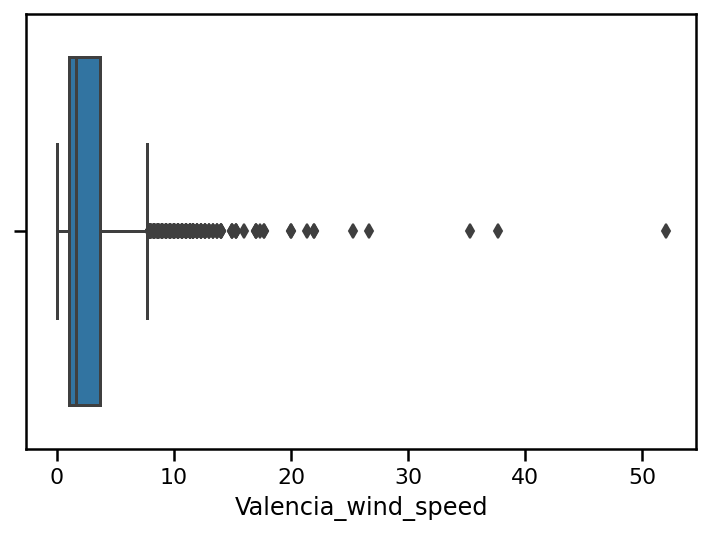

In [22]:
#Visualizing the Valencia_wind_speed data
sns.boxplot(x='Valencia_wind_speed', data=df);

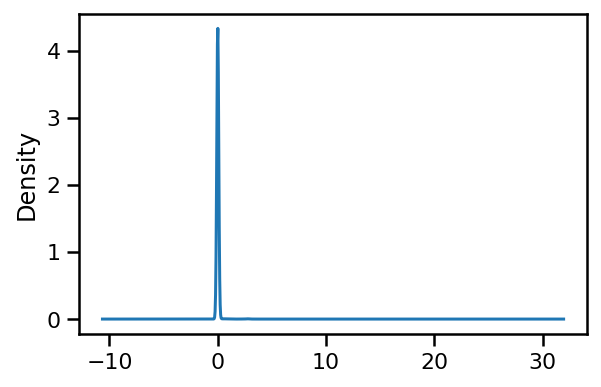

In [23]:
df['Bilbao_snow_3h'].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10));

In [24]:
# evaluate correlation

In [25]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [26]:
# remove missing values/ features

# fill the missing value in Valencia_pressure with the mean, which is 1012.

df.fillna(df.Valencia_pressure.mean(), inplace= True)

In [27]:
df.isna().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

In [28]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00,2015-01-01 18:00:00,2015-01-01 21:00:00,2015-01-02 00:00:00,2015-01-02 03:00:00,2015-01-02 06:00:00,2015-01-02 09:00:00,2015-01-02 12:00:00,2015-01-02 15:00:00,2015-01-02 18:00:00,2015-01-02 21:00:00,2015-01-03 00:00:00,2015-01-03 03:00:00,2015-01-03 06:00:00,2015-01-03 09:00:00,2015-01-03 12:00:00
Madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.333333,2.0
Valencia_wind_deg,level_5,level_10,level_9,level_8,level_7,level_7,level_8,level_9,level_9,level_9,level_9,level_9,level_7,level_7,level_8,level_9,level_8,level_8,level_8,level_9
Bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.333333,1.666667,1.0,1.0,1.0,1.0,1.0,1.333333,2.0,2.0,2.0
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0,69.666667,83.666667,83.666667,86.0,87.0,83.0,77.333333,74.333333,80.666667,89.0,88.0,85.0,84.0,87.333333,88.0
Madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0,67.333333,63.333333,64.0,63.333333,63.666667,67.0,55.666667,55.666667,73.666667,68.0,69.666667,61.0,60.0,66.666667,68.0
Bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0,12.333333,16.333333,8.666667,5.333333,15.333333,21.333333,21.0,20.0,14.333333,5.333333,2.0,6.666667,10.666667,8.666667,3.333333
Bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333,0.666667,1.0,1.333333,1.0,1.0,1.0,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [29]:
df.Valencia_wind_deg.unique()

array(['level_5', 'level_10', 'level_9', 'level_8', 'level_7', 'level_6',
       'level_4', 'level_3', 'level_1', 'level_2'], dtype=object)

In [30]:
df.Seville_pressure = df.Seville_pressure.str[-2:]

In [31]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00
Madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0
Valencia_wind_deg,level_5,level_10,level_9,level_8,level_7
Bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0
Valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0
Madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0
Bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0
Bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333


In [32]:
df['Seville_pressure'] = df['Seville_pressure'].astype(int)

ValueError: invalid literal for int() with base 10: 'p9'

In [ ]:
df.info()

In [ ]:
# create new features

In [ ]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic